Maj 2015, J. Slavič in L. Knez

Vaje #12

In [1]:
# Uvozimo potrebne module

from sympy import *
init_printing()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Vprašanje 1: Na sliki (vir: J. Slavič: Dinamika, meh. nihanja..., 2014) je prikazan trikotnik s stranicami dolžine $a$, $b$, debelino $h$ in gostoto $\rho$.
<img src="others/Slavic 2014 str 242 slika 5.4.png" width=200>
V simbolni obliki določite masni vztrajnostni moment glede na prikazano os $y$:
$$J_{yy}=\int_0^b y^2\,\rho\,h\,(a-a/b\,y)\,dy.$$
Upoštevajte tudi: $m=a\,b\,h\,\rho/2$. Za izmišljene vrednosti izračunajte numerični rezultat.

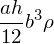

In [2]:
a, b, h, rho, y, m = symbols('a, b, h, rho, y, m')
Jyy = (y**2 * rho * h * (a-a/b*y)).integrate((y, 0, b))
Jyy

Upoštevanje mase:

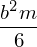

In [3]:
Jyy.expand().subs(rho*a*b*h/2, m)

Izračunajmo še s številkami:

In [4]:
podatki = {'a': 1, 'b': 2, 'rho': 7800, 'h': 0.01}

In [5]:
Jyy.subs(podatki)

### Vprašanje 2: Izračunajte integral tudi numerično. Uporabite ``scipy.integrate`` in integrirajte glede na pravila: trapezno, Simpsonovo 1/3. Rezultat primerjajte tudi z Gaussovo kvadraturo. Raziščite natančnost in hitrost metod.

Definirajmo najprej funkcjo, ki jo je treba integrirati:

In [6]:
def f(y, p=podatki):
    """
    y: spremenljivka
    p: slovar s podatki: a, b, rho, h
    """
    return y**2 * p['rho']* p['h'] * (p['a']-p['a']/p['b']*y)

In [7]:
from scipy import integrate

Da dobimo občutek o funkciji, ki jo integriramo, jo prikažimo.

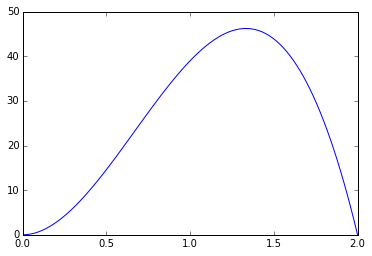

In [8]:
# Definiramo meje integrala 
podatki['ma'] = 0
podatki['mb'] = 2

N = 100
y_d = np.linspace(podatki['ma'], podatki['mb'], N)
f_d = f(y_d, podatki)
plt.plot(y_d, f_d);

In [9]:
#%%timeit
dy = y_d[1]-y_d[0]
integrate.trapz(f_d, dx=dy)  # f_d je array izračunanih vrednosti funkcije

In [10]:
#%%timeit
integrate.simps(f_d, dx=dy)

In [11]:
#%%timeit
integrate.quad(f, 0, podatki['b'], args=podatki)

### Vprašnje 3: Preštudirajte ``scipy.special.legendre``, ki vam vrne objekt ``orthopoly1d``. Ta objekt ima metodo ``weights``, ki vrne seznam ``[x, w, mu0]`` vrednosti, ki jih uporabimo pri Gaussovi kvadraturi. (Če tukaj vsega ne razumete, ne skrbite preveč, bo asistent pokazal/komentiral). Opazite lahko, da smo vrednosti izpeljali na predavanjih!

In [12]:
from scipy import special

Pripravimo Legendrev polinom izbrane stopnje (poskusite več različnih):

In [13]:
poli = special.legendre(3)  # Število točk za Gaussovo kvadraturo je tu 3, meje so od -1 do 1

Pogledamo vozlišča, uteži:

In [14]:
poli.weights  # [x, w, mu0] - vozlišča, uteži

array([[ -7.74596669e-01,   5.55555556e-01,   5.55555556e-01],
       [ -4.78946310e-17,   8.88888889e-01,   8.88888889e-01],
       [  7.74596669e-01,   5.55555556e-01,   5.55555556e-01]])

### Vprašanje 4: S pomočjo zgoraj pridobljenih uteži in vozlišč izračunajte integral s pomočjo Gaussove kvadrature: $\sum_iw_i\,f(x_i)$. Pazite na transformacijo mej:
$$x=\frac{b+a}{2}+\frac{b-a}{2}\xi$$
$$\int_a^bf(x)\,dx\approx\frac{b-a}{2}\sum_i A_i\,f(x_i).$$

Pripravimo delni rezultat - pazimo na transformacijo mej:

In [15]:
aa = [w*f(((podatki['mb']-podatki['ma'])*x + podatki['mb']+podatki['ma'])/2, podatki) for x, w, mu0  in poli.weights]
aa

Izračunamo integral:

In [16]:
(podatki['mb']-podatki['ma'])/2*np.sum(aa)    # Glejte zadnjo formulo

### Vprašanje 5: Preprosti integral $\int_0^2x^2\,dx$ izrabite za prikaz trapeznega in Simpsonovega 1/3 pravila (osnovno pravilo, ne sestavljeno). Uteži izračunajte z uporabo ``scipy``.

Najprej pripravimo funkcijo:

In [17]:
def funk(x):
    return x**2

Pripravimo uteži za trapezno metodo:

In [18]:
w_t, err_t = integrate.newton_cotes(rn=1)
w_t

array([ 0.5,  0.5])

Izračunamo integral po trapezni metodi:

In [19]:
# Meje
meje = np.asarray([0, 2])

# Dolžina odseka
h_t = 2 - 0

# Vozliščne vrednosti
y_t = funk(meje)

# Integral
I_t = np.dot(y_t, w_t*h_t)  
I_t

Preverimo še z vgrajeno metodo:

In [20]:
integrate.trapz(y_t, dx=h_t) 

Pripravimo uteži za Simpsonovo 1/3 metodo:

In [21]:
w_S, err_S = integrate.newton_cotes(rn=2)
w_S

array([ 0.33333333,  1.33333333,  0.33333333])

Izračunamo integral po Simpson 1/3 metodi:

In [22]:
# Točke
tocke = np.asarray([0, 1, 2])

# Dolžina odseka
h_S = (2 - 0)/2

# Vozliščne vrednosti
y_S = funk(tocke)

# Integral
I_S = np.dot(y_S, w_S*h_S)  
I_S

Preverimo še z vgrajeno metodo:

In [23]:
integrate.simps(y_S, dx=h_S)

### Vprašanje 6: Integral predhodne točke razširite za sestavljeno trapezno pravilo (lastna koda). Prikažite vpliv števila odsekov, primerjajte napako izračuna s predhodnim številom odsekov in prikažite konvergenco.

Pripravimo funkcijo, ki računa po trapeznem pravilu. Podati je potrebno meje integrala, uteži in število odsekov. 

In [24]:
def Trapezna(meje, ods=1):
    """
    meje: spodnja in zgornja meja integrala
    st_ods: števil odsekov, ki jih uporabimo za izračun
    """
    x_t = np.linspace(meje[0], meje[1], ods+1)
    h_t = x_t[1]
    y_t = funk(x_t)
    I_t = (y_t[0]/2 + sum(y_t[1:-1]) + y_t[-1]/2)*h_t
    
    return I_t

Izračunamo vrednosti integrala pri različnem številu odsekov:

In [25]:
meje = np.asarray([0, 2])

st_ods = [2**_ for _ in np.arange(10)]

Int = np.asarray([Trapezna(meje, ods=_) for _ in st_ods])

Izrišemo:

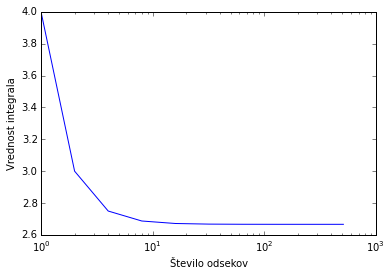

In [26]:
plt.semilogx(st_ods, Int)
plt.xlabel('Število odsekov');
plt.ylabel('Vrednost integrala');

Izrišemo napako:

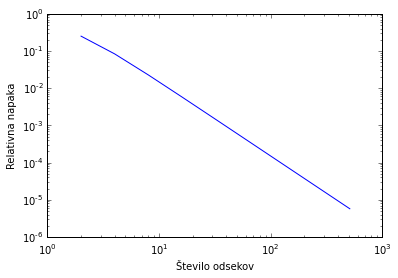

In [27]:
# Izračunamo relativno napako
napaka = abs(Int[1:] - Int[:-1])/Int[:-1]

plt.loglog(st_ods[1:], napaka)
plt.xlabel('Število odsekov');
plt.ylabel('Relativna napaka');

### Vprašanje 7: Integral predhodne točke razširite za sestavljeno Simpsonovo 1/3 pravilo (lastna koda). Prikažite vpliv števila odsekov, primerjajte napako izračuna s predhodnim številom odsekov in prikažite konvergenco.

Pripravimo funkcijo, ki računa po Simpsonovem1/3 pravilu. Podati je potrebno meje integrala, uteži in število odsekov. 

In [28]:
def Simpson13(meje, ods=1):
    """
    meje: spodnja in zgornja meja integrala
    st_ods: števil odsekov, ki jih uporabimo za izračun
    """
    x_S = np.linspace(meje[0], meje[1], ods+1)
    if len(x_S)%2 == 0:
        X_S = np.linspace(meje[0], meje[1], ods+2)
    h_S = x_S[1]
    y_S = funk(x_S)
    I_S = (y_S[0] + 4*sum(y_S[1:-1:2]) + 2*sum(y_S[2:-2:2]) + y_S[-1])*h_S/3
    
    return I_S

Izračunamo vrednosti integrala pri različnem številu odsekov:

In [29]:
meje = np.asarray([0, 2])

st_ods = [2**_ for _ in np.arange(10)]

Int = np.asarray([Simpson13(meje, ods=_) for _ in st_ods])

Izrišemo:

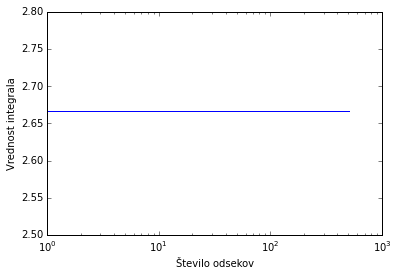

In [30]:
plt.semilogx(st_ods, Int)
plt.xlabel('Število odsekov');
plt.ylabel('Vrednost integrala');

Izrišemo napako:

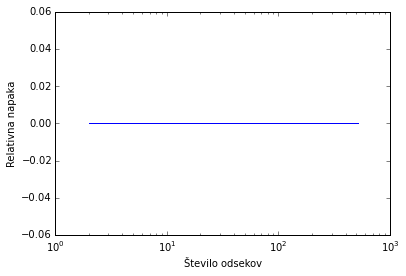

In [31]:
# Izračunamo relativno napako
napaka = abs(Int[1:] - Int[:-1])/Int[:-1]

plt.semilogx(st_ods[1:], napaka)
plt.xlabel('Število odsekov');
plt.ylabel('Relativna napaka');

Vidimo, da metoda takoj konvergira k pravi vrednosti. Integriramo funkcijo $x^2$, ki jo že v prvem koraku popišemo s tremi točkami.

### Vprašanje 8: Z različnimi metodami izračunajte integrala:
$$\int_1^2\frac{\sin(x)}{\sqrt{x}}$$
in
$$\int_0^1\frac{\sin(x)}{\sqrt{x}}.$$

Najprej si pripravimo funkcijo:

In [32]:
def funk2(x):
    return np.sin(x)/np.sqrt(x)

Za predstavo si funkcijo narišimo:

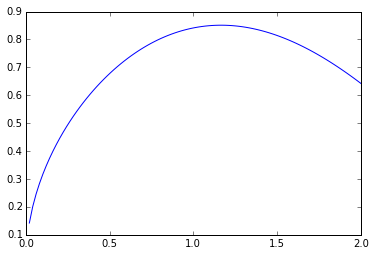

In [34]:
x = np.linspace(0, 2, 100)
vrednosti = funk2(x)

plt.plot(x,vrednosti);

Pri točki x = 0 lahko pričakujemo težave.

Izračunamo prvi integral z vgrajenimi funkcijami:

In [35]:
x = np.linspace(1, 2, 100)
vrednosti = funk2(x)
h = x[1]-x[0]
integrate.trapz(vrednosti, dx=h)

In [36]:
integrate.simps(vrednosti, dx=h)

In [37]:
integrate.quad(funk2, 1, 2)

Izračunamo drugi integral z vgrajenimi funkcijami:

In [38]:
x = np.linspace(0, 2, 100)
vrednosti = funk2(x)
h = x[1]-x[0]
integrate.trapz(vrednosti, dx=h)

In [39]:
integrate.simps(vrednosti, dx=h)

In [41]:
integrate.quadrature(funk2, 0, 2)

In [42]:
integrate.quad(funk2, 0, 2)

Vidimo, da smo integral uspešno izračunali le z Gaussovo kvadraturo, ki zna računati navkljub singularnosti funkcije.

### Vprašanje 9: S pomočjo numeričnega integriranja določite ekvivalentno silo porazdeljene obremenitve ($Q$) ter njeno prijemališče vzdolž nosilca ($x_Q$) dolžine $L = 2\,$m. Konstanta obremenitve: $q_0 = 5\,$kN/m.
<img src="others/nal-num_integriranje_1-1.jpg" width=350>
Rešitev: 
ekvivalentna obremenitev $Q = \int_0^L{q(x) \mathrm{d}x}$, pozicija (težišče) $x_Q = \frac{ \int_0^L{x\,q(x) \mathrm{d}x} }{ \int_0^L{q(x) \mathrm{d}x} }$

Definiramo podatke in funkcijo:

In [43]:
L = 2e3 # mm
q0 = 5 # kN/m

def q_fun(x):
    return q0 * np.sin(x/L * np.pi/2)
    #return q0 * x / L

Za predstavo narišemo funkcijo q.

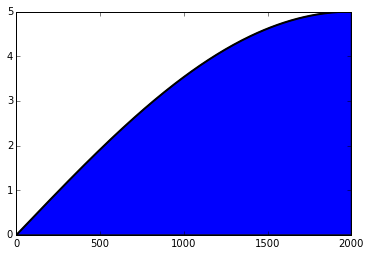

In [46]:
x_vek = np.linspace(0, L, 200)
q_vek = np.asarray([q_fun(_) for _ in x_vek])

plt.plot(x_vek, q_vek, "k-", lw=2);
plt.fill_between(x_vek, q_vek);

Integriramo integral za Q:

In [47]:
n = 100
x = np.linspace(0, L, n)
q_vek = np.asarray([q_fun(_) for _ in x])
dx = x[1] - x[0]

In [48]:
Q = integrate.trapz(q_vek, dx=dx)
Q

Še z quad:

In [49]:
integrate.quad(q_fun, 0, L)

Sedaj pa izračunajmo še zgornji integral za pri formuli za $x_Q$:

In [50]:
def xq_fun(x):
    return q_fun(x) * x

In [51]:
xq_vek = np.asarray([xq_fun(_) for _ in x])

In [52]:
xQ = integrate.trapz(xq_vek, dx=dx)
xQ = xQ / Q
xQ

Še z quad:

In [53]:
integral = integrate.quad(xq_fun, 0, L)
integral

In [54]:
integral[0] / Q

## Ekstra

1. Obravnavajte prikazani enoosni primer, obremenjen z porazdeljeno obremenitvijo $n(x)$ ter točkovno silo $F=10\,$kN. Dolžina palice je $L = 2\,$m, konstanta $n_0 = 15\,$kN/m in $EA = 200000\,\mathrm{MPa} * 50×50\, \mathrm{mm^2}$.
<img src="others/nal-num_integriranje_2-2.jpg" width=350>
Naloga: 
    1. S pomočjo simbolnega integriranja določite funkcijo notranje osne sile $N(x)$.
    * S pomočjo numeričnega integriranja izračunajte pomik prostega konca palice $u_0$.

Izračunamo najprej točko A:

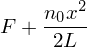

In [61]:
import sympy as sp

x, F, L, n0 = sp.symbols('x, F, L, n0')


N_x = F + sp.integrate(n0 * x/L, x)
N_x

Izračunajmo sedaj še točko B. Pripravimo si podatke in funkcijo ter jo izrišimo:

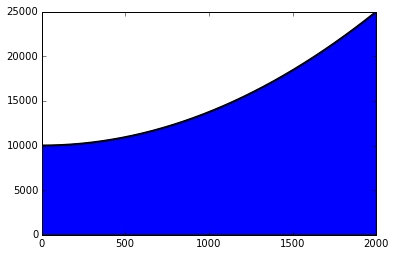

In [63]:
F = 10*1e3 # N
L = 2e3 # mm
n0 = 15 # kN/m
EA = 200000 * 50*50 # MPa*mm^2

def N_fun(x):
    return N_x.subs({'F':F, 'L':L, 'n0':n0, 'x':x})

# Izris
x_vek = np.linspace(0, L, 200)
N_vek = np.asarray([N_fun(_) for _ in x_vek]).astype(float)
plt.plot(x_vek, N_vek, 'k-', lw=2);
plt.fill_between(x_vek, N_vek);

Integrirajmo funkcijo:

In [67]:
n = 100
x = np.linspace(0, L, n)
N_vek = np.asarray([N_fun(_) for _ in x]).astype(float)
dx = x[1] - x[0]

u0 = integrate.trapz(N_vek, dx=dx)/ EA # mm
u0

Še z quad:

In [65]:
integral = integrate.quad(N_fun, 0, L)
integral

In [66]:
integral[0] / EA